This notebook is the analysis supporting the paper titled  _Assessing the impact of general practice software on prescribing safety recommendations for diltiazem, tacrolimus and ciclosporin. A cohort study in English NHS primary care_

In [1]:
##import libraries neededd
import pandas as pd
import numpy as np
from ebmdatalab import bq, maps, charts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
## ensuring the format is consistent for pounds and pence
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Part 1: Breaches in Guidance by practice/CCG

## 1a Ciclosporin and Tacrolimus

In [64]:
sql='''
SELECT
  p.month,
  practice_id,
  numerator,
  denominator,
  calc_value,
  percentile
FROM
  `ebmdatalab.measures.practice_data_ciclosporin` AS p
INNER JOIN
  ebmdatalab.hscic.practices AS prac
ON
  p.practice_id = prac.code
JOIN
  hscic.practice_statistics
ON
  practice_statistics.practice = prac.code
WHERE
  (total_list_size > 1000 ##need to add prac = 4 here
  AND denominator > 0)
GROUP BY
p.month,
practice_id, 
numerator,
denominator,
calc_value,
percentile
'''

df1a = bq.cached_read(sql, csv_path='df1a.csv')
df1a['month'] = pd.to_datetime(df1a['month'])
df1a.head(5)


C:\Users\bmackenna\Anaconda3\lib\site-packages\pandas\io\gbq.py:149: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  credentials=credentials, verbose=verbose, private_key=private_key)


,month,practice_id,numerator,denominator,calc_value,percentile
0,2015-03-01,A81001,0,2,0.00,0.00
1,2014-06-01,A81001,0,1,0.00,0.00
2,2014-05-01,A81001,0,1,0.00,0.00
3,2015-01-01,A81001,0,2,0.00,0.00
4,2014-08-01,A81001,0,2,0.00,0.00


In [65]:
df1a2018 = df1a.loc[(df1a["month"]>= "2018-01-01") & (df1a["month"]<="2018-12-01")]
df1a2018.head(5)

,month,practice_id,numerator,denominator,calc_value,percentile
15,2018-08-01,A81002,0,3,0.00,0.00
16,2018-04-01,A81002,0,4,0.00,0.00
22,2018-09-01,A81002,0,4,0.00,0.00
27,2018-06-01,A81002,0,3,0.00,0.00
30,2018-12-01,A81002,0,3,0.00,0.00


In [68]:
df1a2018.describe(percentiles=(.1,.90))

,numerator,denominator,calc_value,percentile
count,49466.00,49466.00,49466.00,49466.00
mean,0.48,3.94,0.15,0.21
std,1.16,3.83,0.30,0.37
min,0.00,1.00,0.00,0.00
10%,0.00,1.00,0.00,0.00
50%,0.00,3.00,0.00,0.00
90%,2.00,8.00,0.67,0.89
max,65.00,66.00,1.00,0.93


In [69]:
df1a2018.sum(numeric_only=True)

numerator      23688.00
denominator   195116.00
calc_value      7189.50
percentile     10563.50
dtype: float64

In [70]:
#number of practices in the dataset who prescribed at least one Rx and have a list size >1000?
df1a2018.practice_id.nunique()

5434

In [71]:
#now lets restrict to values where numerator is greater than 0 i.e. some generic Rxs
breachciclo = df1a2018[df1a2018['numerator']>0]
breachciclo.head()

,month,practice_id,numerator,denominator,calc_value,percentile
205489,2018-01-01,A89006,1,16,0.06,0.74
205496,2018-10-01,B81062,1,16,0.06,0.75
205504,2018-04-01,B83014,1,16,0.06,0.75
205507,2018-06-01,B83614,1,16,0.06,0.76
205508,2018-11-01,B83614,1,16,0.06,0.77


In [72]:
#the number of practices that breached the ciclosporin/tacrolimus in 2018 
breachciclo.practice_id.nunique()

2238

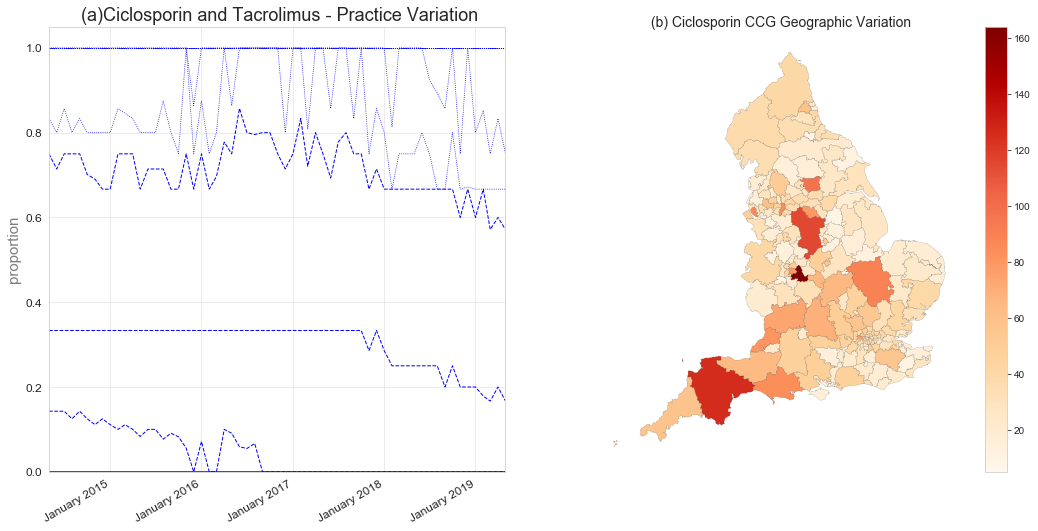

In [75]:
plt.figure(figsize=(18,20))
layout = gridspec.GridSpec(2, 2)
left_ax = plt.subplot(layout[0, 0])
right_subplot = layout[0, 1]



charts.deciles_chart(
        df1a,
        period_column='month',
        column='calc_value',
        title=" (a)Ciclosporin and Tacrolimus - Practice Variation",
        ylabel="proportion",
        show_outer_percentiles=True,
        show_legend=False,
    ax=left_ax
    )
maps.ccg_map(by_pct, title=" (b) Ciclosporin CCG Geographic Variation", 
             column='calc_value', cartogram=False,
                          subplot_spec=right_subplot)

plt.show()

### 1b Diltiazem

In [76]:
sql='''
SELECT
  p.month,
  practice_id,
  numerator,
  denominator,
  calc_value,
  percentile
FROM
  ebmdatalab.measures.practice_data_diltiazem AS p
INNER JOIN
  ebmdatalab.hscic.practices AS prac
ON
  p.practice_id = prac.code
JOIN
  hscic.practice_statistics
ON
  practice_statistics.practice = prac.code
WHERE
  (total_list_size > 1000 ##need to add prac = 4 here
    AND denominator > 0)
GROUP BY
  p.month,
  practice_id,
  numerator,
  denominator,
  calc_value,
  percentile
'''

df1b = bq.cached_read(sql, csv_path='diltiazem.csv')
df1b.head(5)

C:\Users\bmackenna\Anaconda3\lib\site-packages\pandas\io\gbq.py:149: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  credentials=credentials, verbose=verbose, private_key=private_key)


,month,practice_id,numerator,denominator,calc_value,percentile
0,2016-07-01,A81007,20,101,0.20,0.66
1,2018-04-01,A81007,17,109,0.16,0.65
2,2017-12-01,A81007,17,100,0.17,0.67
3,2017-06-01,A81007,19,113,0.17,0.65
4,2016-08-01,A81007,20,111,0.18,0.64


In [77]:
df1b2018 = df1b.loc[(df1b["month"]>= "2018-01-01") & (df1b["month"]<="2018-12-01")]
df1b2018.head(5)

,month,practice_id,numerator,denominator,calc_value,percentile
1,2018-04-01,A81007,17,109,0.16,0.65
6,2018-05-01,A81007,25,101,0.25,0.75
7,2018-06-01,A81007,26,114,0.23,0.73
9,2018-01-01,A81007,19,116,0.16,0.65
11,2018-03-01,A81007,22,116,0.19,0.69


In [78]:
df1b2018.describe(percentiles=(.1,.90))

,numerator,denominator,calc_value,percentile
count,83715.00,83715.00,83715.00,83715.00
mean,3.49,28.43,0.16,0.44
std,5.50,27.82,0.22,0.35
min,0.00,1.00,0.00,0.00
10%,0.00,5.00,0.00,0.00
50%,2.00,21.00,0.08,0.50
90%,9.00,60.00,0.47,0.90
max,118.00,384.00,1.00,0.99


In [79]:
df1b2018.sum(numeric_only=True)

numerator      292205.00
denominator   2379612.00
calc_value      13542.69
percentile      37216.45
dtype: float64

In [80]:
#number of practices in the dataset who prescribed at least one Rx and have a list size >1000?
df1b2018.practice_id.nunique()

7170

In [81]:
#now lets restrict to values where numerator is greater than 0 i.e. some generic Rxs
breachdilt = df1b2018[df1b2018['numerator']>0]
breachdilt.head()

,month,practice_id,numerator,denominator,calc_value,percentile
1,2018-04-01,A81007,17,109,0.16,0.65
6,2018-05-01,A81007,25,101,0.25,0.75
7,2018-06-01,A81007,26,114,0.23,0.73
9,2018-01-01,A81007,19,116,0.16,0.65
11,2018-03-01,A81007,22,116,0.19,0.69


In [82]:
#the number of practices that breached the ciclosporin/tacrolimus in 2018 
breachdilt.practice_id.nunique()

5771

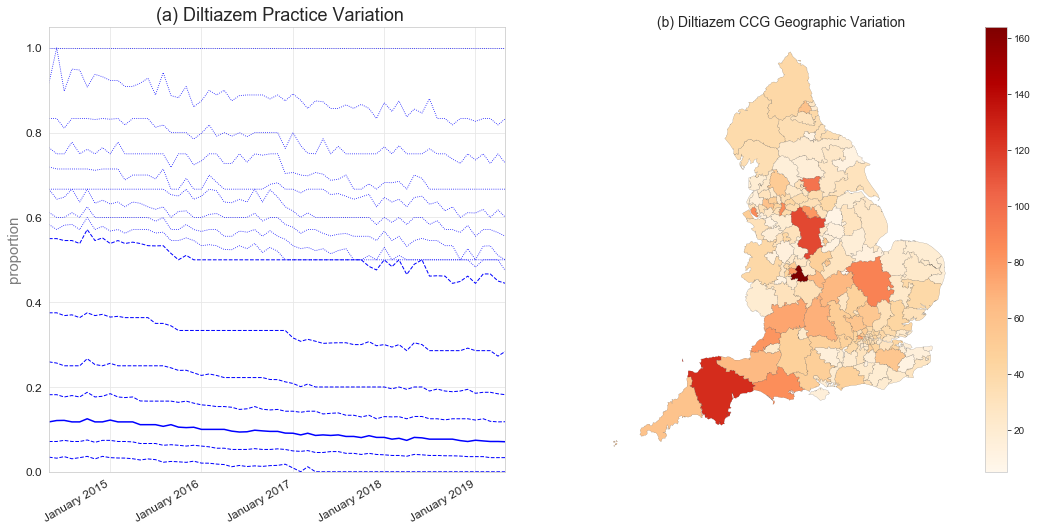

In [84]:
plt.figure(figsize=(18,20))
layout = gridspec.GridSpec(2, 2)
left_ax = plt.subplot(layout[0, 0])
right_subplot = layout[0, 1]



charts.deciles_chart(
        df1b,
        period_column='month',
        column='calc_value',
        title=" (a) Diltiazem Practice Variation",
        ylabel="proportion",
        show_outer_percentiles=True,
        show_legend=False,
    ax=left_ax
    )
maps.ccg_map(by_pct, title=" (b) Diltiazem CCG Geographic Variation", 
             column='calc_value', cartogram=False,
                          subplot_spec=right_subplot)

plt.show()

# Part 2: EHR Work

In [18]:
##Importing GP EHR Deployment Data
###this will need cleaning up? Seb/ALex?
vendors = pd.read_csv(r'C:\Users\bmackenna\Documents\GitHub\jupyter-notebooks\measures_by_software\vendors.csv')
# Clean up the input data
vendors['Principal Supplier'] = vendors['Principal Supplier'].str.strip()
vendors.loc[vendors['Principal Supplier'] == 'INPS', 'Principal Supplier'] = 'Vision'  # seems they changed in 2017
vendors = vendors.loc[vendors['Date'] > '2016-02-01']  # there is some dirty data ("Unknowns") before this

start = pd.to_datetime('2016-01-01')
mid = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2018-12-01')

## 2a ciclosporin and tacrolimus measure data linked to EHR provider

In [21]:
import importlib
importlib.reload(bq)
measures = ['ciclosporin']

def get_data(measure_id):
    sql = """
SELECT
  TRIM(Principal_Supplier) AS supplier,
  m.practice_id,
  m.pct_id,
  m.month,
  numerator,
  denominator,
  '{measure_id}' AS measure_id
FROM
  measures.practice_data_{measure_id} m
JOIN
  hscic.vendors software
ON
  software.ODS = practice_id
  AND Date = m.month
JOIN
  hscic.practices
ON
  practices.code = software.ODS
JOIN
  hscic.practice_statistics
ON
  practice_statistics.practice = practices.code
  AND Date = DATE(practice_statistics.month)
WHERE
  total_list_size > 100
  AND practices.status_code = 'A'
  AND denominator > 0
ORDER BY
  month""".format(measure_id=measure_id)
    import pandas as pd
    df = bq.cached_read(sql, csv_path="ciclosporintacro.csv".format(measure_id))
    return df


df2a = get_data('ciclosporin')
df2a.head(5)

,supplier,practice_id,pct_id,month,numerator,denominator,measure_id
0,TPP,A81002,00K,2016-01-01,0,5,ciclosporin
1,TPP,A81004,00M,2016-01-01,0,6,ciclosporin
2,TPP,A81005,00M,2016-01-01,0,1,ciclosporin
3,TPP,A81006,00K,2016-01-01,0,3,ciclosporin
4,EMIS,A81007,00K,2016-01-01,0,1,ciclosporin


In [22]:
df2a['calc_value'] = df2a['numerator'] / df2a['denominator']
df2a['month'] = pd.to_datetime(df2a['month'])

Text(0.5,1,'ciclosporin.tacrolimus measure, mean values per supplier')

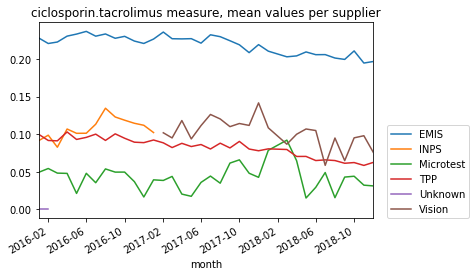

In [23]:
df2a.groupby(['month', 'supplier']).mean()['calc_value'].unstack().plot.line()
plt.legend(loc=(1.04,0))
plt.title("ciclosporin.tacrolimus measure, mean values per supplier")

In [24]:
df2a.rename(columns={'pct_id':'pct'}, inplace=True)  # The CCG column must be named 'pct' for the maps function
by_pct = df2a[df2a['month'] == end].groupby('pct').sum().reset_index()
by_pct['calc_value'] = by_pct['numerator'] / by_pct['denominator']
by_supplier_and_pct = df2a.groupby(['supplier', 'pct']).sum().reset_index()
by_supplier_and_pct['calc_value'] = by_supplier_and_pct['numerator'] / by_supplier_and_pct['denominator']
by_supplier_and_pct.head(5)

,supplier,pct,numerator,denominator,calc_value
0,EMIS,00D,20,476,0.04
1,EMIS,00J,440,2049,0.21
2,EMIS,00K,9,229,0.04
3,EMIS,00L,15,1184,0.01
4,EMIS,00M,239,779,0.31


In [27]:
dfccg = df2a.groupby(['month','pct']).sum().reset_index()
dfccg.head(5)

,month,pct,numerator,denominator,calc_value
0,2016-01-01,00C,2,47,0.37
1,2016-01-01,00D,10,195,2.87
2,2016-01-01,00J,19,177,3.33
3,2016-01-01,00K,14,77,2.88
4,2016-01-01,00L,1,174,1.00


### 2b - Diltiazem linked with EHR

In [30]:
importlib.reload(bq)
measures = ['diltiazem']

def get_data(measure_id):
    sql = """
SELECT
  TRIM(Principal_Supplier) AS supplier,
  m.practice_id,
  m.pct_id,
  m.month,
  numerator,
  denominator,
  '{measure_id}' AS measure_id
FROM
  measures.practice_data_{measure_id} m
JOIN
  hscic.vendors software
ON
  software.ODS = practice_id
  AND Date = m.month
JOIN
  hscic.practices
ON
  practices.code = software.ODS
JOIN
  hscic.practice_statistics
ON
  practice_statistics.practice = practices.code
  AND Date = DATE(practice_statistics.month)
WHERE
total_list_size > 100
  AND practices.status_code = 'A'
  AND denominator > 0
ORDER BY
  month""".format(measure_id=measure_id)
    import pandas as pd
    df2 = bq.cached_read(sql, csv_path="diltiazem.csv".format(measure_id))
    return df2


df2b = get_data('diltiazem')
df2b.head(5)

C:\Users\bmackenna\Anaconda3\lib\site-packages\pandas\io\gbq.py:149: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  credentials=credentials, verbose=verbose, private_key=private_key)


,supplier,practice_id,pct_id,month,numerator,denominator,measure_id
0,EMIS,A81021,00M,2016-01-01,51,88,diltiazem
1,EMIS,A82008,01K,2016-01-01,26,33,diltiazem
2,EMIS,A82009,01K,2016-01-01,33,50,diltiazem
3,EMIS,A82010,01K,2016-01-01,25,32,diltiazem
4,EMIS,A82020,01H,2016-01-01,26,79,diltiazem


In [31]:
df2b['calc_value'] = df2b['numerator'] / df2b['denominator']
df2b['month'] = pd.to_datetime(df2b['month'])

Text(0.5,1,'diltiazem measure, mean values per supplier')

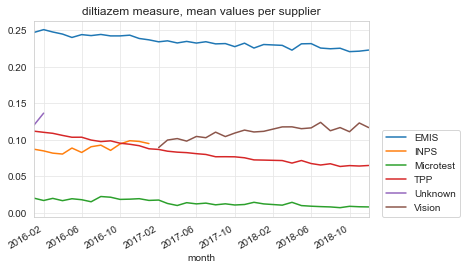

In [32]:
df2b.groupby(['month', 'supplier']).mean()['calc_value'].unstack().plot.line()
plt.legend(loc=(1.04,0))
plt.title("diltiazem measure, mean values per supplier")

In [33]:
df2b.rename(columns={'pct_id':'pct'}, inplace=True)  # The CCG column must be named 'pct' for the maps function
by_pct = df2b[df2b['month'] == end].groupby('pct').sum().reset_index()
by_pct['calc_value'] = by_pct['numerator'] / by_pct['denominator']
by_supplier_and_pct = df2b.groupby(['supplier', 'pct']).sum().reset_index()
by_supplier_and_pct['calc_value'] = by_supplier_and_pct['numerator'] / by_supplier_and_pct['denominator']

### What do CCGs with a 50/50 emis/tpp split look like?

In [43]:
single_month = df2b[df2b['month'] == end]


In [44]:
by_pct_and_supplier = single_month.groupby(['pct', 'supplier']).count().reset_index()
by_pct = single_month.groupby(['pct']).count().reset_index()

In [45]:
# Create a list of CCGs in which between them TPP and EMIS roughly equally dominate the market
both = by_pct_and_supplier.merge(by_pct, how='inner', left_on='pct', right_on='pct')
both['proportion'] = both['practice_id_x'] / both['practice_id_y']
proportions = both[['pct', 'supplier_x', 'proportion']]
interesting_pcts = []
for key, rows in proportions.groupby('pct'):
    emis = tpp = None
    for i, row in rows.iterrows():
        if row['supplier_x'] == 'EMIS':
            emis = row['proportion']
        elif row['supplier_x'] == 'TPP':
            tpp = row['proportion']
    if emis is not None and tpp is not None:
        if emis > 0.4 and tpp > 0.4 and abs(emis - tpp) > 0.06:
            interesting_pcts.append(key)

In [46]:
qwe = pd.DataFrame(interesting_pcts)
qwe['interesting'] = 100
qwe.columns = ['pct', 'interesting']

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


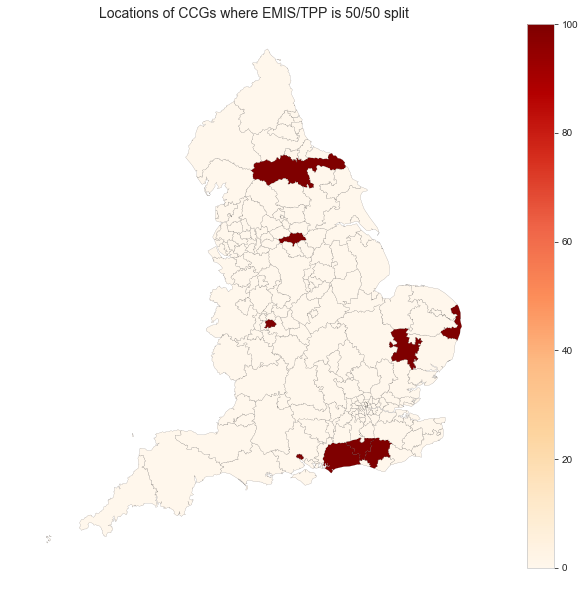

In [59]:
plt.figure(figsize=(16,10))
qwe = pd.concat([qwe, pd.DataFrame([{'pct': '08H', 'interesting': 0}])])
maps.ccg_map(
        qwe, 
        column='interesting', 
        title='Locations of CCGs where EMIS/TPP is 50/50 split',
        )
plt.show()

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


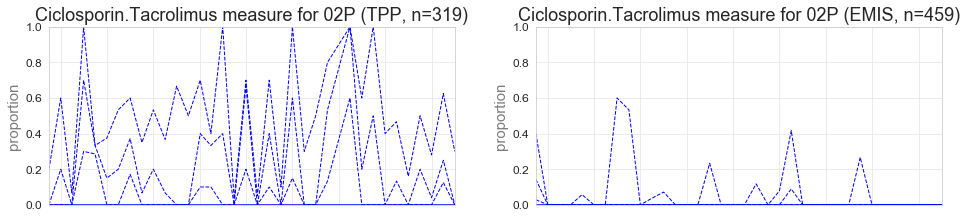

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


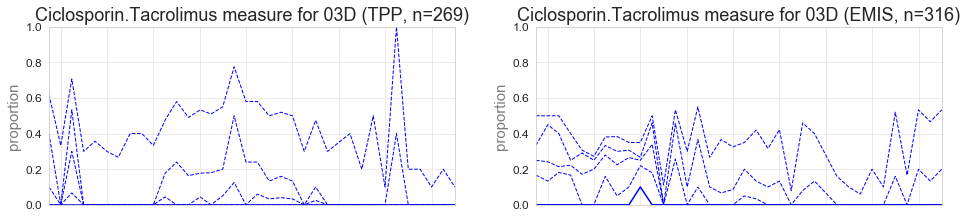

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


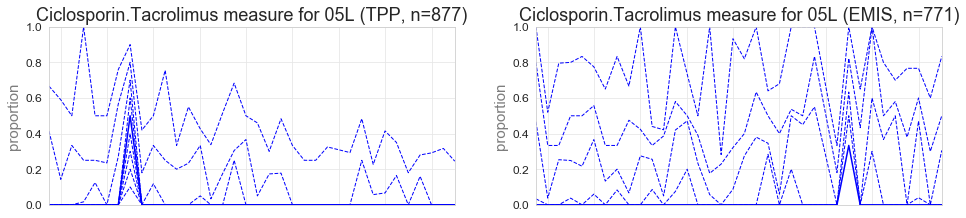

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


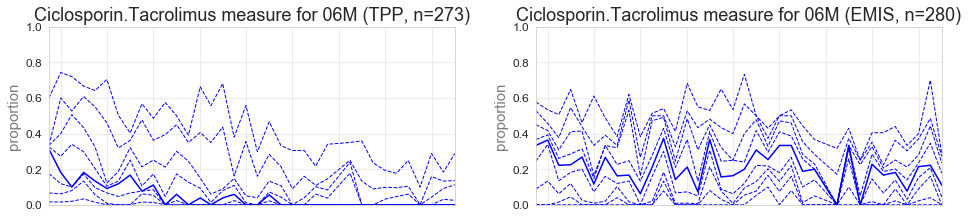

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


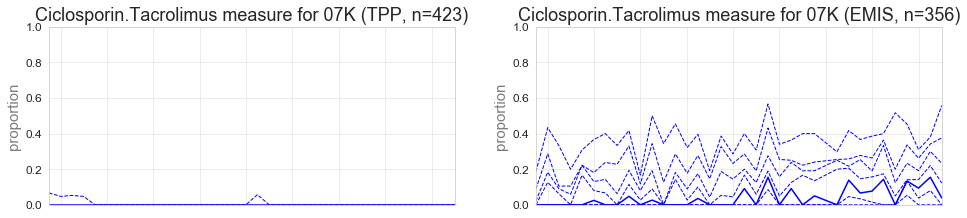

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


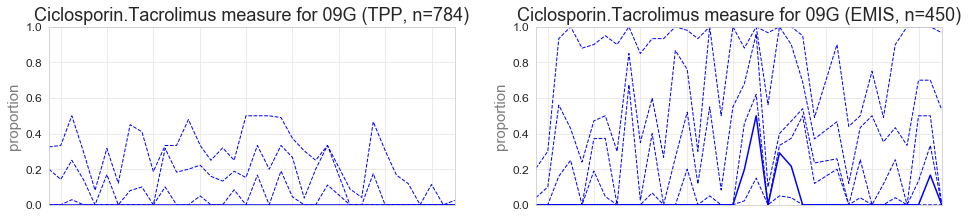

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


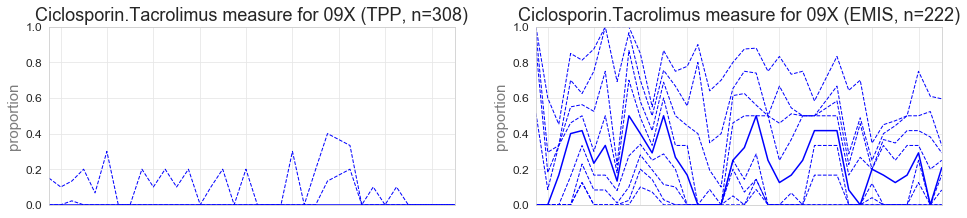

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


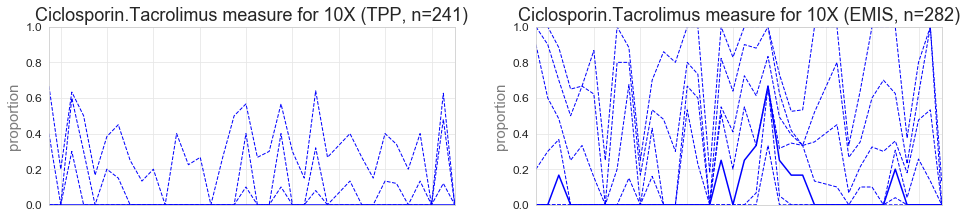

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


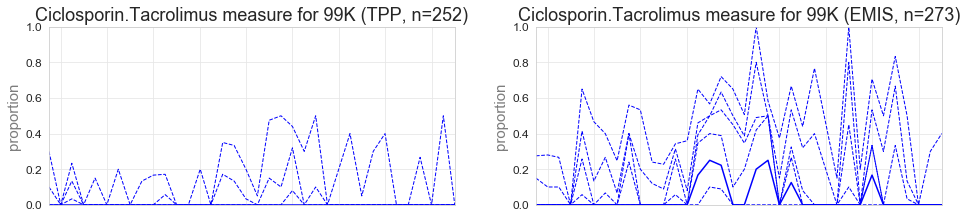

In [61]:
# Plot them side-by-side
for ccg in interesting_pcts:
    plt.figure(figsize=(16,8))
    layout = gridspec.GridSpec(2, 2)
    left_plot = plt.subplot(layout[0])
    plt.setp(left_plot.get_yticklabels(), visible=True)
    for cell, supplier in enumerate(['TPP', 'EMIS']):
        data = df2a[(df2a['supplier'] == supplier) & (df2a['pct'] == ccg)]
        plt.ylim(0,1.0)
        charts.deciles_chart(
            data,
            period_column='month',
            column='calc_value',
            title="Ciclosporin.Tacrolimus measure for {} ({}, n={})".format(ccg, supplier, data.practice_id.count()),
            ylabel="proportion",
                        show_outer_percentiles=False, show_legend=False,
            
            ax=plt.subplot(layout[cell])
        )
    plt.ylim(0,1.0)
    plt.show()

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


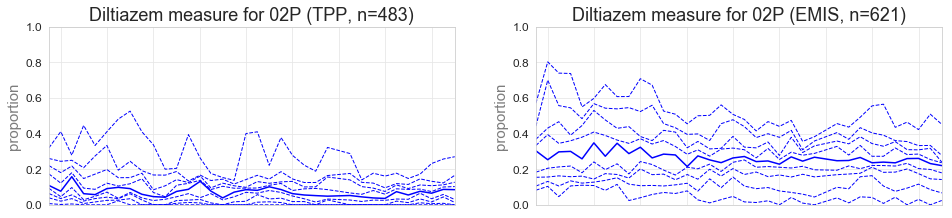

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


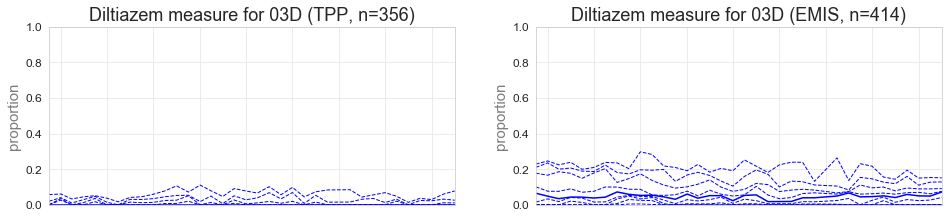

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


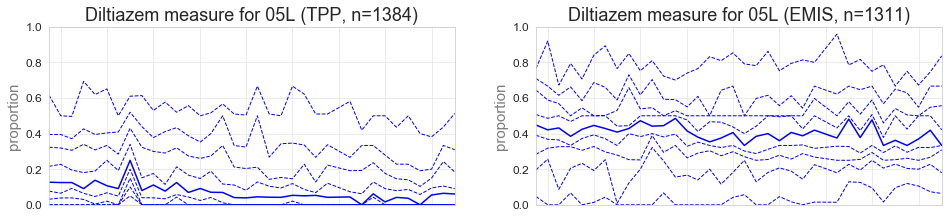

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


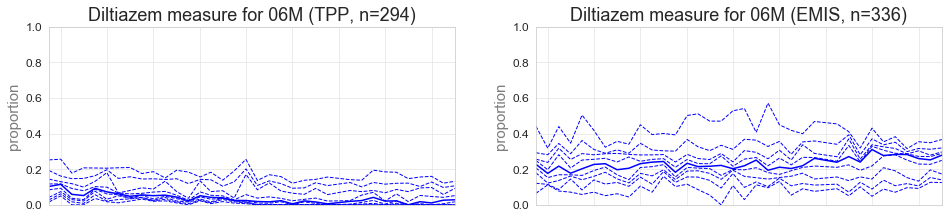

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


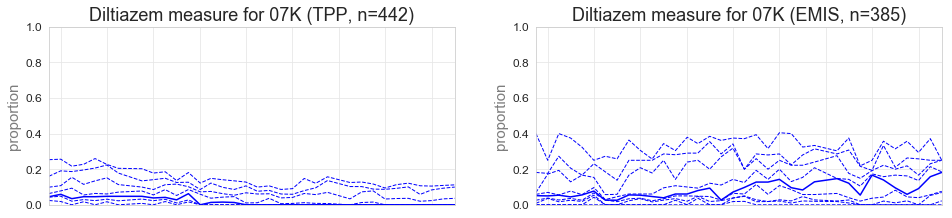

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


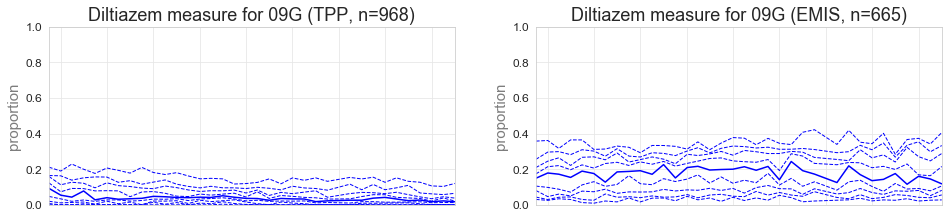

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


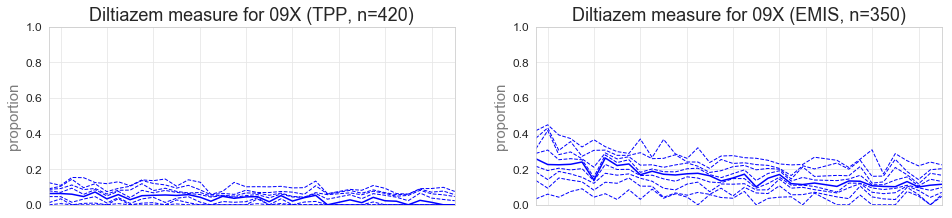

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


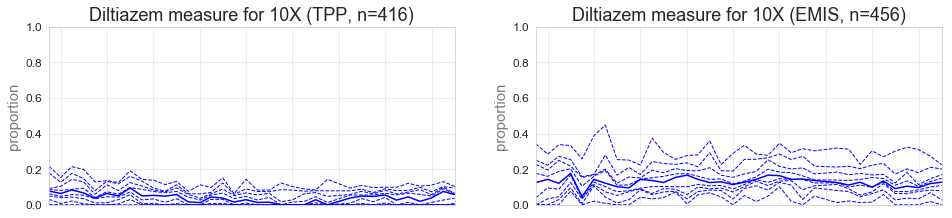

C:\Users\bmackenna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


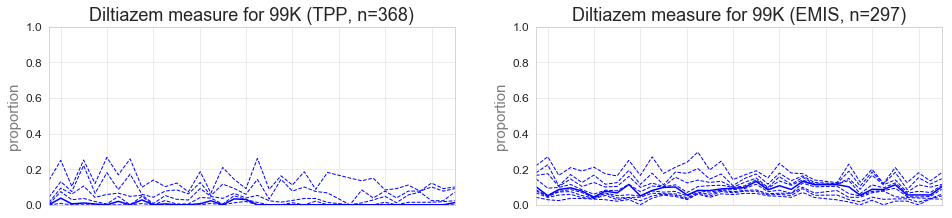

In [62]:
# Plot them side-by-side
for ccg in interesting_pcts:
    plt.figure(figsize=(16,8))
    layout = gridspec.GridSpec(2, 2)
    left_plot = plt.subplot(layout[0])
    plt.setp(left_plot.get_yticklabels(), visible=True)
    for cell, supplier in enumerate(['TPP', 'EMIS']):
        data = df2b[(df2b['supplier'] == supplier) & (df2b['pct'] == ccg)]
        plt.ylim(0,1.0)
        charts.deciles_chart(
            data,
            period_column='month',
            column='calc_value',
            title="Diltiazem measure for {} ({}, n={})".format(ccg, supplier, data.practice_id.count()),
            ylabel="proportion",
                        show_outer_percentiles=False, show_legend=False,
            
            ax=plt.subplot(layout[cell])
        )
    plt.ylim(0,1.0)
    plt.show()